In [1]:
import sys
sys.path.insert(0, './../Libs/')
import numpy as np
from BasisFunction import BaseBasicFunction
from SVM import DualitySVM, PrimalSVM
import matplotlib.pyplot as plt
import sklearn.datasets as skdata
from sklearn.utils import shuffle

def _shuffle(X, t):
    X, t = shuffle(X, t.ravel())
    t = t.reshape(-1, 1)
    return (X, t)

In [2]:
Nsamples = 200
halfNsamples = int(Nsamples/2)
noiseStd = 0.1

funcs = [
    lambda x: x[:, 0],
    lambda x: x[:, 1],
    lambda x: x[:, 0] * x[:, 1],
    lambda x: x[:, 0] ** 2,
    lambda x: x[:, 1] ** 2,
    lambda x: (x[:, 0] ** 2) * x[:, 1],
    lambda x: (x[:, 1] ** 2) * x[:, 0],
    lambda x: x[:, 0] ** 3,
    lambda x: x[:, 1] ** 3,
#     lambda x: (x[:, 0] ** 3) * x[:, 1],
#     lambda x: (x[:, 1] ** 3) * x[:, 0],
#     lambda x: (x[:, 0] ** 2) * (x[:, 1] ** 2),
#     lambda x: x[:, 0] ** 4,
#     lambda x: x[:, 1] ** 4,
]

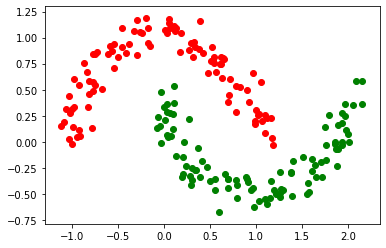

In [3]:
X, t = skdata.make_moons(n_samples = Nsamples, noise = noiseStd, shuffle = False, random_state = 0)

plt.scatter(X[:halfNsamples, 0], X[:halfNsamples, 1], c = 'r')
plt.scatter(X[halfNsamples:, 0], X[halfNsamples:, 1], c = 'g')

X1 = X[:halfNsamples, :]
X_1 = X[halfNsamples:, :]
t1 = np.ones(halfNsamples).reshape(-1, 1)
t_1 = -np.ones(halfNsamples).reshape(-1, 1)

t = np.vstack((t1, t_1))
X, t = _shuffle(X, t)

In [4]:
Xfeatures = BaseBasicFunction(X, funcs).generate(False)
svm = PrimalSVM(Xfeatures, t).fit()

done fitting, w = 
[[ 2.37132058]
 [ 1.99651958]
 [ 0.58903331]
 [ 5.32950385]
 [-0.27966466]
 [ 2.34428575]
 [-3.19872096]
 [-3.83386416]
 [ 2.93981342]
 [-2.70434664]]


(-0.8, 1.3)

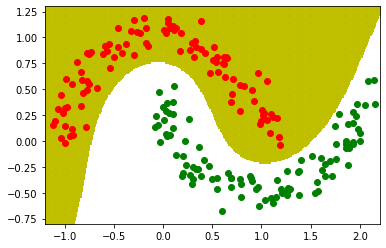

In [5]:
def __classify(xy, t):
    class1 = []
    class_1 = []
    for i in range(len(t)):
        if t[i].item() > 0:
            class1.append(xy[i])
        else:
            class_1.append(xy[i])
    return (np.array(class1), np.array(class_1))

xplot = np.linspace(-1.2, 2.2, 300)
yplot = np.linspace(-1.2, 2.2, 300)
xgrid, ygrid = np.meshgrid(xplot, yplot)
xgrid = xgrid.reshape(-1, 1)
ygrid = ygrid.reshape(-1, 1)

xygrid = np.hstack((xgrid, ygrid))
xygen = BaseBasicFunction(xygrid, funcs).generate(False)

prediction = svm.predict(xygen)
class1, class_1 = __classify(xygrid, prediction)

plt.scatter(class1[:, 0], class1[:, 1], c = 'y', marker = 's', s = 1)

plt.scatter(X1[:, 0], X1[:, 1], c = 'r')
plt.scatter(X_1[:, 0], X_1[:, 1], c = 'g')

plt.xlim(-1.2, 2.2)
plt.ylim(-0.8, 1.3)